In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [261]:
df = pd.read_csv('Diabetes_Preprocessed.csv')

In [262]:
df.head(100)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,preceding_year_visits,number_diab_meds,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Not Available,Referral,1,41,0,1,0,0,0,Diabetes,Not Required,Not Required,1,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,no_med
1,Caucasian,0,15,Emergency,Discharged to home,Emergency,3,59,0,18,0,0,0,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,insulin_only
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency,2,11,5,13,2,0,1,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,1,0,3,1,0,other_meds
3,Caucasian,1,35,Emergency,Discharged to home,Emergency,2,44,1,16,0,0,0,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,insulin_only
4,Caucasian,1,45,Emergency,Discharged to home,Emergency,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0,0,2,0,insulin_combo
5,Caucasian,1,55,Emergency,Discharged to home,Referral,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,0,1,0,0,1,0,insulin_only
6,Caucasian,1,65,Elective,Discharged to home,Referral,4,70,1,21,0,0,0,Circulatory,Circulatory,External causes of injury,7,None,None,0,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0,0,3,0,insulin_combo
7,Caucasian,1,75,Emergency,Discharged to home,Emergency,5,73,0,12,0,0,0,Circulatory,Respiratory,Diabetes,8,None,None,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,1,0,0,1,0,other_meds
8,Caucasian,0,85,Emergency,Discharged to home,Transferred from another health care facility,13,68,2,28,0,0,0,Circulatory,Circulatory,Infectious and Parasitic,8,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0,0,2,0,insulin_combo
9,Caucasian,0,95,Elective,Transferred to another medical facility,Transferred from another health care facility,12,33,3,18,0,0,0,Circulatory,Neoplasms,Respiratory,8,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0,0,2,0,insulin_combo


In [263]:
df.shape

(97070, 47)

In [264]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97070 entries, 0 to 97069
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      97070 non-null  object
 1   gender                    97070 non-null  int64 
 2   age                       97070 non-null  int64 
 3   admission_type_id         97070 non-null  object
 4   discharge_disposition_id  97070 non-null  object
 5   admission_source_id       97070 non-null  object
 6   time_in_hospital          97070 non-null  int64 
 7   num_lab_procedures        97070 non-null  int64 
 8   num_procedures            97070 non-null  int64 
 9   num_medications           97070 non-null  int64 
 10  number_outpatient         97070 non-null  int64 
 11  number_emergency          97070 non-null  int64 
 12  number_inpatient          97070 non-null  int64 
 13  diag_1                    97070 non-null  object
 14  diag_2                

In [266]:
num_cols = ['age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'preceding_year_visits', 'number_diab_meds', 'number_changes']

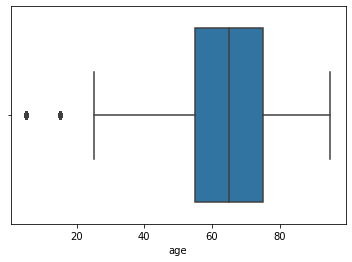

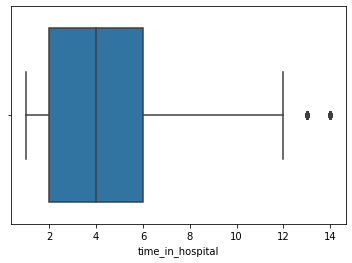

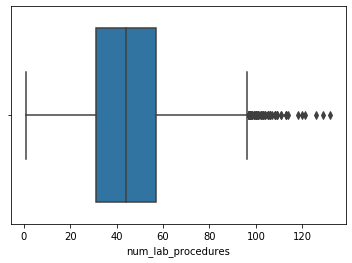

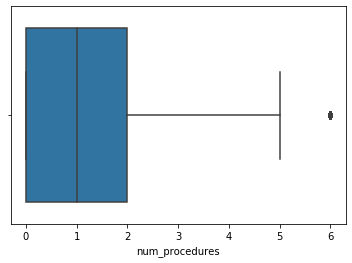

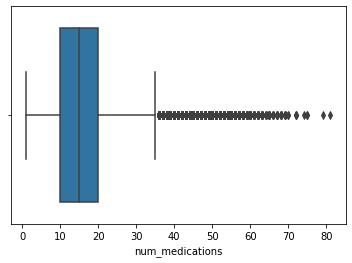

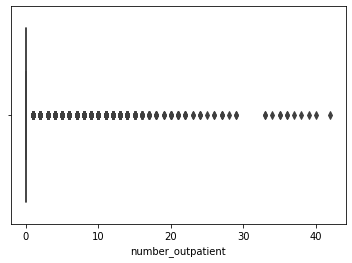

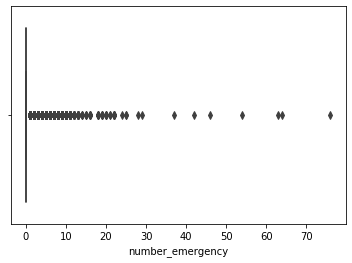

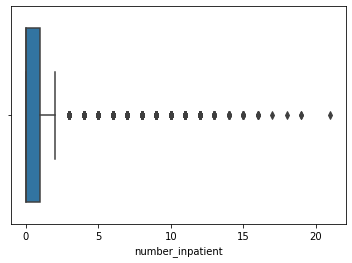

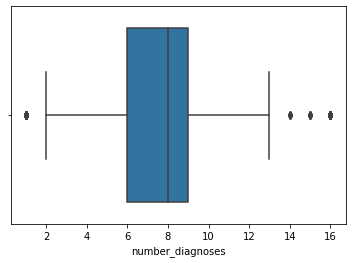

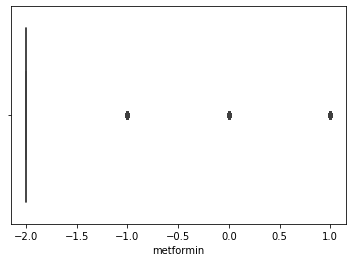

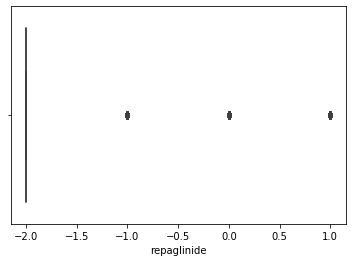

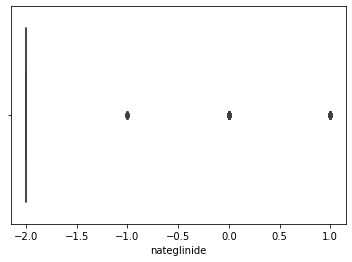

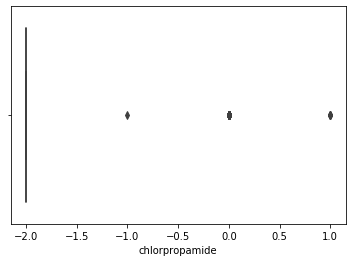

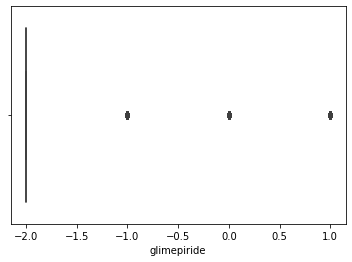

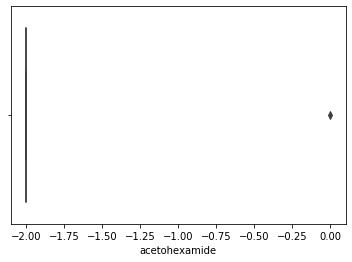

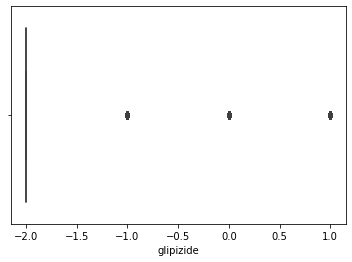

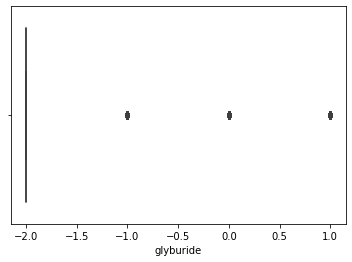

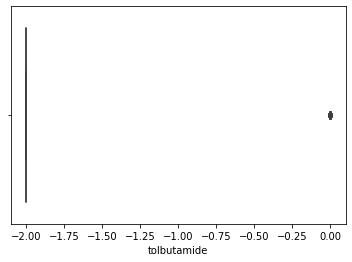

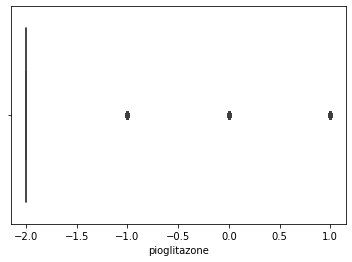

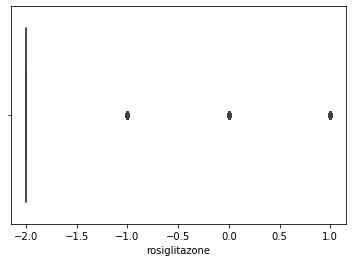

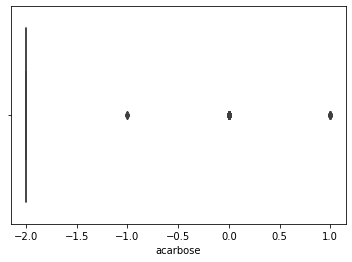

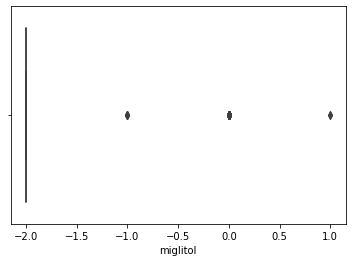

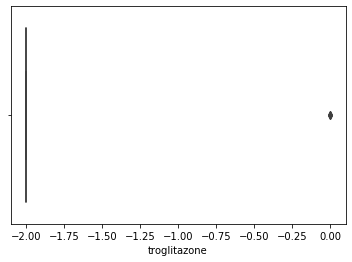

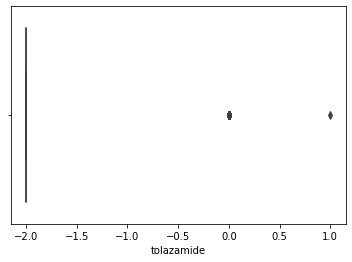

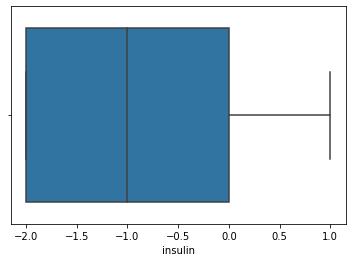

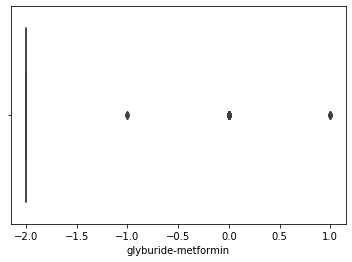

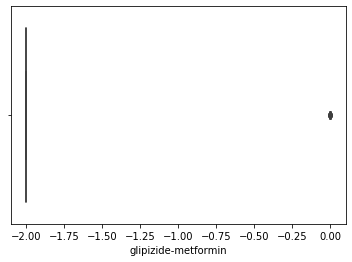

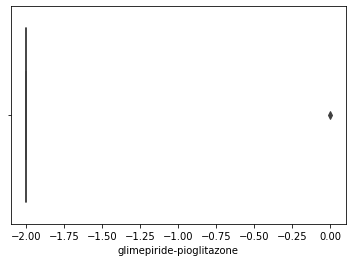

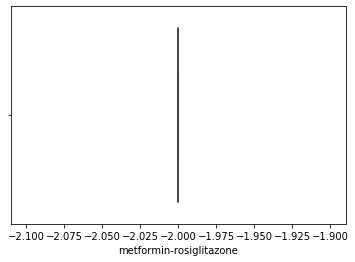

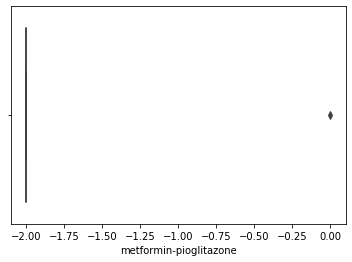

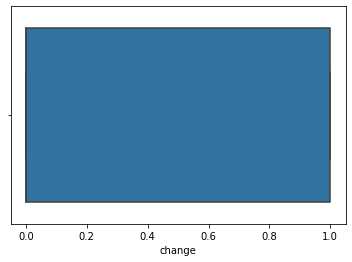

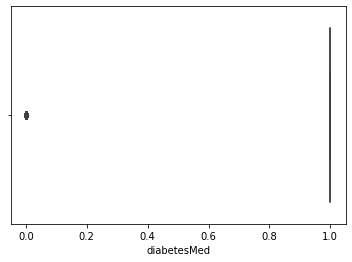

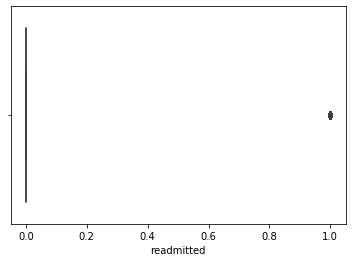

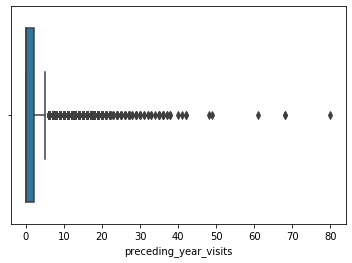

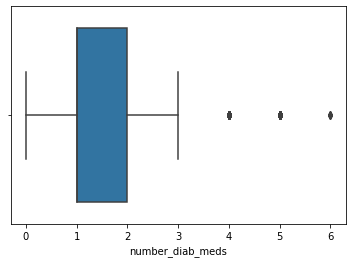

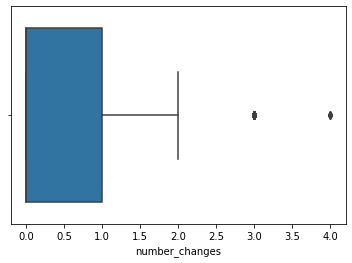

In [267]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

In [268]:
for i in num_cols:
    print(i,df[i].skew(),'\n')

age -0.6252653355646172 

time_in_hospital 1.1411393564324346 

num_lab_procedures -0.23970335089394984 

num_procedures 1.3203963443071582 

num_medications 1.3313285726526911 

number_outpatient 8.81127306079252 

number_emergency 22.651845639513823 

number_inpatient 3.6163762573103426 

number_diagnoses -0.8855291560642684 

metformin 1.5998606392198451 

repaglinide 8.1379482504768 

nateglinide 12.050770200998418 

chlorpropamide 35.27275356017414 

glimepiride 4.252199146120854 

acetohexamide 311.56058800817556 

glipizide 2.3833126311624984 

glyburide 2.7345879444178482 

tolbutamide 69.64660880105657 

pioglitazone 3.3572338598311586 

rosiglitazone 3.6509831571511793 

acarbose 18.25832937498443 

miglitol 53.63961272404322 

troglitazone 179.874029899614 

tolazamide 50.45249850121383 

insulin 0.39579523685755547 

glyburide-metformin 11.969629555195413 

glipizide-metformin 86.39533490716094 

glimepiride-pioglitazone 311.56058800817533 

metformin-rosiglitazone 0 

metf

In [269]:
from sklearn.preprocessing import PowerTransformer,power_transform
from sklearn.model_selection import train_test_split

In [270]:
pt = PowerTransformer(method='yeo-johnson')

In [271]:
df_pt = pd.DataFrame(pt.fit_transform(df[num_cols]),columns=num_cols)

C:\Users\This PC\anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\This PC\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\This PC\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [272]:
skew_df = pd.DataFrame({'Skeness_before': df[num_cols].skew(),'Skewness_after':df_pt.skew()})

In [273]:
skew_df

,Skeness_before,Skewness_after
age,-0.625265,-0.119083
time_in_hospital,1.141139,0.012974
num_lab_procedures,-0.239703,-0.230143
num_procedures,1.320396,0.207424
num_medications,1.331329,0.019316
number_outpatient,8.811273,1.796058
number_emergency,22.651846,2.438005
number_inpatient,3.616376,0.737851
number_diagnoses,-0.885529,-0.154843
metformin,1.599861,1.506761


In [274]:
cat_cols = ['race', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult','insulin_treatment']
for i in cat_cols:
    df_chi = pd.crosstab(df[i],df.readmitted).T
    chistats,pvalue,df1,exp_feq = stats.chi2_contingency(df_chi)
    dtf = pd.DataFrame({'chis_stats':chistats,'Pvalue':pvalue,'Degree':df1},index=[i])
    print(dtf)

      chis_stats   Pvalue  Degree
race    7.187395  0.12631       4
                   chis_stats        Pvalue  Degree
admission_type_id    33.08093  6.554917e-08       2
                          chis_stats         Pvalue  Degree
discharge_disposition_id  823.397855  1.002865e-175       5
                     chis_stats        Pvalue  Degree
admission_source_id   43.488797  1.937846e-09       3
        chis_stats        Pvalue  Degree
diag_1  175.443777  7.642047e-28      18
        chis_stats        Pvalue  Degree
diag_2  135.658659  1.229337e-19      19
        chis_stats        Pvalue  Degree
diag_3  188.897017  5.426864e-30      19
               chis_stats    Pvalue  Degree
max_glu_serum   19.040189  0.000268       3
           chis_stats        Pvalue  Degree
A1Cresult   39.842944  1.150395e-08       3
                   chis_stats        Pvalue  Degree
insulin_treatment  183.252359  1.750135e-39       3


In [296]:
for i in num_cols:
    s,p = stats.ttest_ind(df[df['readmitted']==0][i],df[df['readmitted']==1][i])
    print(i,'-',s,p)

age - -6.634381363050815 3.2756936011238865e-11
time_in_hospital - -14.703673436380624 6.893070040431489e-49
num_lab_procedures - -7.579361743279913 3.503247992239911e-14
num_procedures - 3.1690090033321168 0.0015300709318069798
num_medications - -13.186934134863394 1.1288468667827902e-39
number_outpatient - -5.955377414737886 2.6036109838648476e-09
number_emergency - -19.02718481003242 1.4249170044824705e-80
number_inpatient - -53.32466143236484 0.0
number_diagnoses - -16.718267193584175 1.1811131215603948e-62
metformin - 8.355167136300974 6.618863230253719e-17
repaglinide - -2.8514111599422303 0.004353482755227272
nateglinide - -0.15461028915412225 0.8771288794190681
chlorpropamide - 1.5897418660590248 0.11189625924518838
glimepiride - 2.5805095687640636 0.009866916697424606
acetohexamide - 0.35968928908197306 0.7190802852555789
glipizide - -0.5223664162459313 0.6014164264154002
glyburide - 2.118774035909902 0.0341121007048734
tolbutamide - 0.9065814263684622 0.36463043783703286
piog

In [297]:
for i in num_cols:
    s,p = stats.f_oneway(df[df['readmitted']==1][i],df[df['readmitted']==0][i])
    print(i,'-',s,p)

age - 44.01501607039529 3.275693601299605e-11
time_in_hospital - 216.19801252372585 6.893070040748984e-49
num_lab_procedures - 57.4467244354951 3.50324799243207e-14
num_procedures - 10.04261806320002 0.0015300709318757395
num_medications - 173.89523187722574 1.1288468668441138e-39
number_outpatient - 35.4665201519701 2.6036109840101055e-09
number_emergency - 362.0337617951283 1.4249170045527198e-80
number_inpatient - 2843.5195168763416 0.0
number_diagnoses - 279.5004579560728 1.1811131216158576e-62
metformin - 69.80881787552396 6.618863230577273e-17
repaglinide - 8.130545603042867 0.004353482755461344
nateglinide - 0.023904341512338806 0.8771288794322919
chlorpropamide - 2.527279200701632 0.11189625925085016
glimepiride - 6.65902963448279 0.009866916697970107
acetohexamide - 0.12937638468148288 0.7190802852468501
glipizide - 0.2728666728216061 0.6014164263983024
glyburide - 4.489203415245885 0.03411210070648465
tolbutamide - 0.821889882636045 0.36463043780687776
pioglitazone - 4.675106

C:\Users\This PC\anaconda3\lib\site-packages\scipy\stats\stats.py:3349: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


change - 34.6437815226441 3.971966354330933e-09
diabetesMed - 67.07799571738609 2.6410617432927897e-16
readmitted - 1.7514199658953474e+20 0.0
preceding_year_visits - 1620.6576194213244 0.0
number_diab_meds - 0.057673283676141815 0.8102124453045834
number_changes - 130.3301010755455 3.6274197674230404e-30


In [286]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [292]:
for i in num_cols:
    model = ols(i+'~C(readmitted)', data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(readmitted),1.0,31.064710,31.064710,130.330101,3.627420e-30
Residual,97068.0,23136.552896,0.238354,NaN,NaN
